# Titanic Dataset Exploratory Data Analysis

Welcome to the EDA notebook for the Titanic Dataset. In this notebook, we'll:
- Load and inspect the dataset.
- Explore its structure and key features.
- Visualize the distribution of data and understand relationships between variables.

Before we start, ensure that you've placed the Titanic dataset file (e.g., `train.csv`, `test.csv`) into the `Titanic_Dataset/data/raw/` folder.


## Step 1: Import Libraries and Load the Dataset

We will begin by importing the necessary Python libraries and loading the Titanic dataset. Make sure the dataset is located in `data/raw/train.csv`.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the Titanic dataset
df = pd.read_csv('C:/Users/ycarvalho/OneDrive - EDENRED/Documentos/Data_Analysis_MLE_Kaggle/Titanic_Dataset/data/raw/train.csv')

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 4: Data Cleaning

In this step, we'll:
- Check for missing values and data inconsistencies.
- Handle missing data by filling or dropping values.
- Prepare the dataset for feature engineering and modeling.

Let's start by examining the missing values in our dataset.


Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


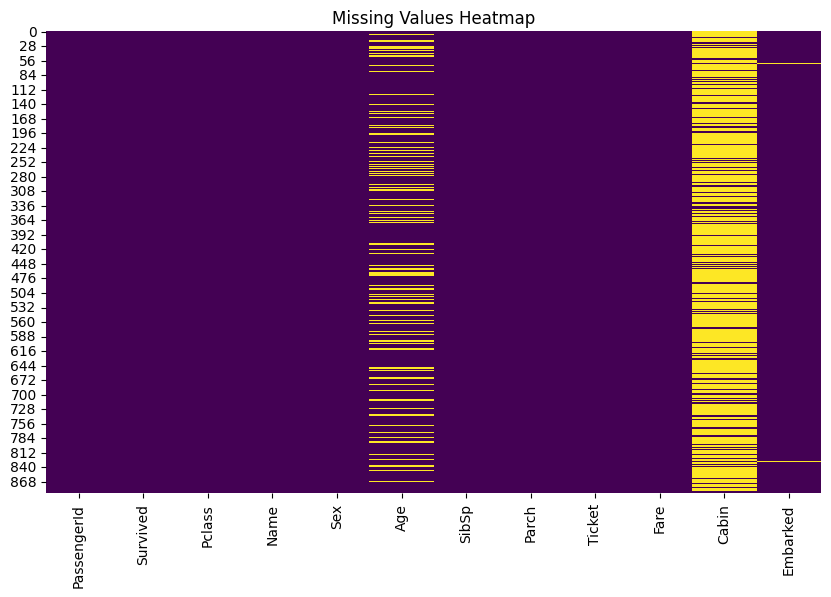

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Visualize missing values using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Handling Missing Values

Based on our inspection:
- For columns with a significant number of missing values (e.g., `Cabin`), we might decide to drop the column.
- For columns with a few missing entries (e.g., `Age`), we can fill in the missing values using strategies like the median or mean.
  
Next, we'll implement some strategies to handle these missing values.


In [4]:
# Drop the 'cabin' column as it has many missing values
df_cleaned = df.drop(['Cabin'], axis=1)

# Fill missing 'Age' values with the median age
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())

# For the 'Embarked' column, fill missing values with the most common value
df_cleaned['Embarked'] = df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0])

# Verify the changes
print("Missing values after cleaning:\n", df_cleaned.isnull().sum())


Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Step 5: Feature Engineering

Now that our data is cleaned, we'll create new features and transform existing ones to help our machine learning model. In this step, we will:
- Create a **FamilySize** feature to represent the total number of family members aboard.
- Extract the **Title** from the passenger's name, which can provide useful information about their social status.
- Convert categorical variables (like **Sex**, **Embarked**, and **Title**) into numerical values so that our model can process them.

Let's begin!

In [5]:
# Make a copy of the cleaned data for feature engineering
df_fe = df_cleaned.copy()

# 1. Create a FamilySize feature: FamilySize = SibSp + Parch + 1 (self)
df_fe['FamilySize'] = df_fe['SibSp'] + df_fe['Parch'] + 1

# 2. Extract Title from the Name column
df_fe['Title'] = df_fe['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify the titles by grouping similar ones together
df_fe['Title'] = df_fe['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
)
df_fe['Title'] = df_fe['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Convert 'Embarked' column: S=0, C=1, Q=2
df_fe['Embarked'] = df_fe['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

# Convert 'Title' column: assign numeric codes
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
df_fe['Title'] = df_fe['Title'].map(title_mapping)

# Check for the first few rows of our feature engineered Dataframe
df_fe.head()

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ycarvalho\AppData\Local\Temp\2\ipykernel_18808\4129754957.py:8: SyntaxWarning: invalid escape sequence '\.'
  df_fe['Title'] = df_fe['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,2,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,2,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,2,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1,NaN


**What We Did:**
- **FamilySize:** We created a new column combining the number of siblings/spouses (`SibSp`) and parents/children (`Parch`), plus one for the passenger.
- **Title:** Extracted from the `Name` column, then simplified into common groups.
- **Categorical Conversion:** Transformed `Sex`, `Embarked`, and `Title` into numeric values.

These new features can help our model capture more nuanced relationships in the data.


## Step 6: Model Building and Evaluation

With our features ready, we now move on to building a machine learning model. For this project, we'll start with a **Logistic Regression** model to predict survival. In this step, we will:
- Prepare our feature matrix and target variable.
- Split the data into training and testing sets.
- Train a Logistic Regression model.
- Evaluate its performance using metrics such as accuracy, confusion matrix, and classification report.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the features (X) and the target (y)
# Drop columns are not useful for the model: PassangerId, Name, and Ticket
X = df_fe.drop(['PassangerId', 'Name', 'Survived'], axis=1)
y = df_fe['Survived']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

KeyError: "['PassangerId'] not found in axis"

**Model Performance Recap:**

- **Accuracy:** Indicates the proportion of correct predictions.
- **Confusion Matrix:** Shows the breakdown of true positives, false positives, true negatives, and false negatives.
- **Classification Report:** Provides precision, recall, f1-score, and support for each class.

These metrics give us a good understanding of how well our model is performing on the test set.


## Step 7: Saving the Model

Now that we have a trained Logistic Regression model and have evaluated its performance, we want to save the model. This allows us to reuse it later without retraining, which is especially useful for deployment or for generating final predictions on unseen data (like the Kaggle test set).

We'll use Python's `pickle` library to serialize our model and save it to the `models` folder.


In [ ]:
import pickle

# Save the Logistic Regression model to a file in the 'models' folder
model_save_path = 'C:\Users\ycarvalho\OneDrive - EDENRED\Documentos\Data_Analysis_MLE_Kaggle\Titanic_Dataset\models'
with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)

print ("Model saved to:", model_save_path)


## Making Final Predictions for Kaggle Submission

If you have the Kaggle test dataset (commonly named `test.csv`), you can use your trained model to generate predictions. These predictions can then be formatted into a submission file for the Kaggle competition.

### Steps:
1. Load the test dataset.
2. Perform any necessary preprocessing and feature engineering (using the same steps as with the training data).
3. Use the saved model to predict outcomes.
4. Save the predictions to a CSV file.


In [8]:
# Load the test dataset (make sur it's in the correct folder, e.g., 'data/raw')
test_df = pd.read_csv('C:/Users/ycarvalho/OneDrive - EDENRED/Documentos/Data_Analysis_MLE_Kaggle/Titanic_Dataset/data/raw/test.csv')

# Assume we've applied the same feature engineering steps to the test data.
# For simplicity, we'll only select the same features we used in training:
# (Remember to processo missing values, encode categorical features, etc.)
# Here, we'll simulate that by dropping the same columns.
X_test_final = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Use the trained model to predict the survival outcome
final_predictions = model.predict(X_test_final)

# Create a submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_predictions
})

# Save the submission file to the 'reports' folder (or a dedicated 'submissions' folder)
submission_file = 'C:/Users/ycarvalho/OneDrive - EDENRED/Documentos/Data_Analysis_MLE_Kaggle/Titanic_Dataset/reports/submission.csv'
submission.to_csv(submission_file, index=False)

print("Submission file saved to:", submission_file)

NameError: name 'model' is not defined